In [18]:
import os
import pandas as pd
import pandas.api.types as ptypes
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import pickle
import csv
from sklearn.metrics import accuracy_score

In [19]:
# Import dataset

dataset = pd.read_csv("Salary_Data.csv")
x =dataset.iloc[:,:-1].values
y =dataset.iloc[:,1].values
dataset.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [20]:
# check for describe
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [21]:
# check for info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [22]:
# check for num of rows and cols

print ('The train data has {0} rows and {1} columns'.format(dataset.shape[0],dataset.shape[1]))

The train data has 30 rows and 2 columns


In [23]:
# check for null 

dataset.isnull()

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [24]:
def csv_file(x_train_data,y_train_data,file_name):
    myData = x_train_data
    myFile = open(file_name, 'w')  
    with myFile:
        writer = csv.writer(myFile)
        writer.writerows(myData)
    # colomn
    colnames=['x'] 
    df = pd.read_csv(file_name, names=colnames, header=None)
    # inserting column with static value in data frame 
    df.insert(1, "y", y_train_data)
   
    df.to_csv(file_name , index =  False)
    


In [25]:
def splitdata(x, y):
    
    x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(x,y,test_size = 1/3, random_state=0)
    
    csv_file(x_test_data,y_test_data,'test_data.csv')

    x_train_data, x_cv_data, y_train_data, y_cv_data = train_test_split(x_train_data,y_train_data,test_size = 0.40,random_state=0)
    
    csv_file(x_train_data,y_train_data,'train_data.csv')
    csv_file(x_cv_data,y_cv_data,'cv_data.csv') 
#     return x_train_data,x_test_data,y_train_data,y_test_data,x_cv_data,y_cv_data
splitdata(x, y)

In [26]:
dataset = pd.read_csv("train_data.csv")

In [27]:
print("x_train shape",x.shape)
print("y_train shape",y.shape)

x_train shape (30, 1)
y_train shape (30,)


Accuracy train data :  95.5020600755191


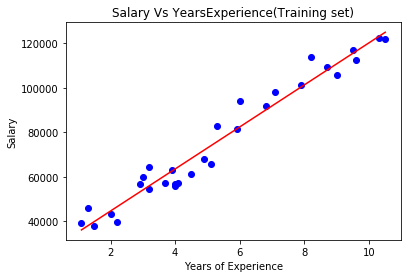

In [31]:
class Simple_Linear_regression:
    
    # fitting sample linear regresion to the training set
    
    def model_train(self,x,y):  
        regressor = LinearRegression()
        regressor.fit(x,y)
        return regressor
    
    # dump train model pickle file
    
    def pickel_file(self,regressor):
        
       
        file = open('trainmodel.pkl', 'wb')
        pickle.dump(regressor,file)
        file.close()
    
    # predicting the test set result and train set result
    
    def prediction(self,x,regressor):
    
        y_pred_train = regressor.predict(x)
        return y_pred_train

    # Accuracy for train and test
    
    def accuracy(self,y,y_pred_train):
        
        # Accuracy = r2_score(y,y_pred_train)*100
        Accuracy = r2_score(y_pred_train,y)*100
        return Accuracy
    
    # visualising the training set results
    
    def plotting(self,x, y,y_pred_train):
        
        plt.scatter(x, y , color = 'blue')
        plt.plot(x, y_pred_train, color = 'red')
        plt.title("Salary Vs YearsExperience(Training set)")
        plt.xlabel("Years of Experience")
        plt.ylabel("Salary")
        plt.show()
        
def main(dataset,x,y):
    
    object_SimpleLR = Simple_Linear_regression()
    
    regressor = object_SimpleLR.model_train(x,y)
#     print("Regressor : ", regressor)
    
    object_SimpleLR.pickel_file(regressor)
    
    
    y_pred_train = object_SimpleLR.prediction(x,regressor)
#     print("prediction of y train data : ",y_pred_train)
    
    Accuracy = object_SimpleLR.accuracy(y,y_pred_train)
    print("Accuracy train data : ", Accuracy)
    
    
    object_SimpleLR.plotting(x,y,y_pred_train)
    
    
    
    
    
main(dataset,x,y)
    
